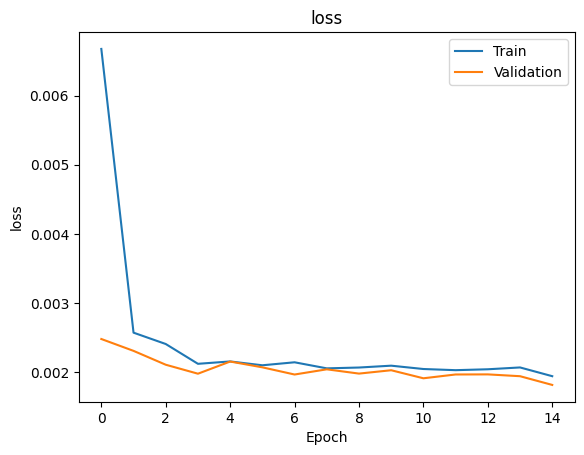

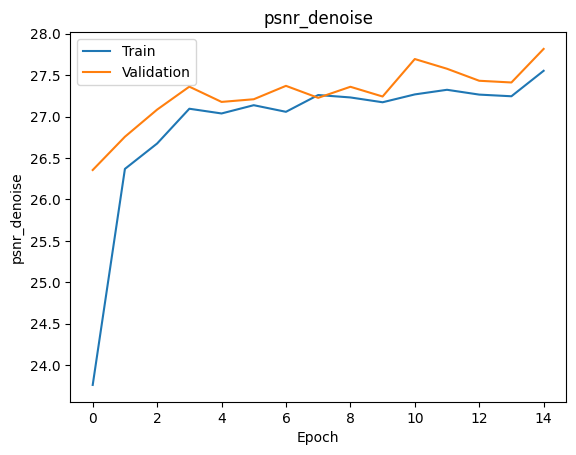

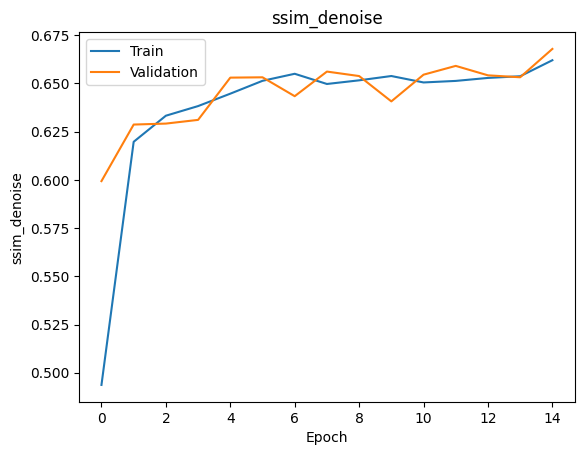

In [12]:
import os
import json
import matplotlib.pyplot as plt

# Function to read JSON files from a folder
def read_json_files_from_folder(folder_path):
    data = {}
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.json'):
            with open(os.path.join(folder_path, file_name), 'r') as f:
                epoch_number = int(file_name.split('_')[0].replace('epoch', ''))
                data[epoch_number] = json.load(f)
    return data

# Function to plot metrics
def plot_metrics(metrics_data, metric_name):
    epochs = sorted(metrics_data.keys())
    train_values = [metrics_data[epoch][metric_name] for epoch in epochs]
    val_values = [metrics_data[epoch]['val_' + metric_name] for epoch in epochs]

    plt.plot(epochs, train_values, label='Train')
    plt.plot(epochs, val_values, label='Validation')
    plt.title(metric_name)
    plt.xlabel('Epoch')
    plt.ylabel(metric_name)
    plt.legend()
    plt.show()

# Folder path containing JSON files
folder_path = './weights_new/json_file_with_gan'

# Read JSON files
metrics_data = read_json_files_from_folder(folder_path)

# Plot each metric
metrics_to_plot = ['loss', 'psnr_denoise', 'ssim_denoise']
for metric in metrics_to_plot:
    plot_metrics(metrics_data, metric)


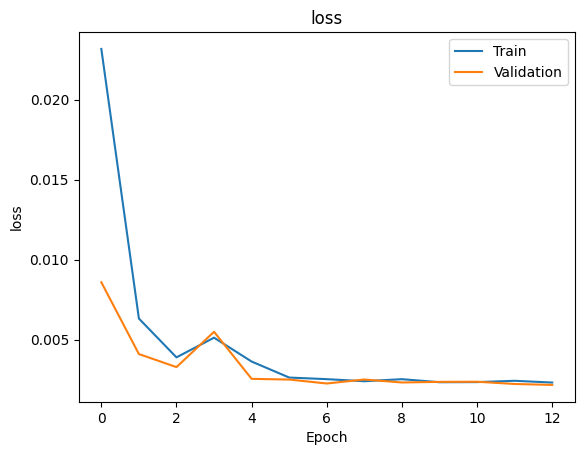

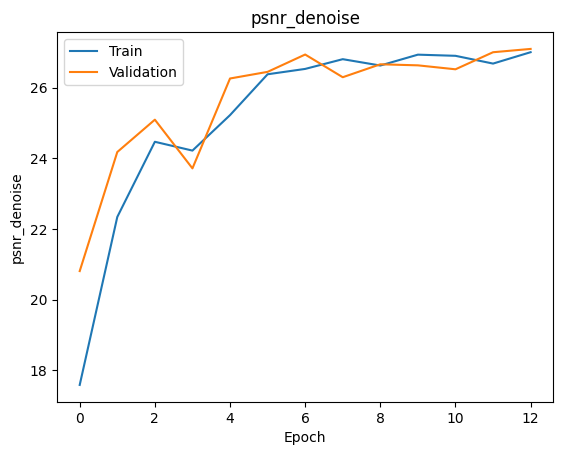

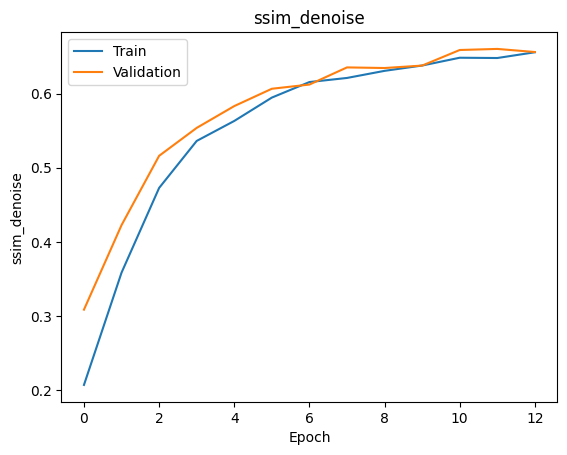

In [4]:
import os
import json
import matplotlib.pyplot as plt

# Function to read JSON files from a folder
def read_json_files_from_folder(folder_path):
    data = {}
    file_names = sorted(os.listdir(folder_path))  # Sort file names
    for file_name in file_names:
        if file_name.endswith('.json'):
            with open(os.path.join(folder_path, file_name), 'r') as f:
                epoch_number = int(file_name.split('_')[0].replace('epoch', ''))
                data[epoch_number] = json.load(f)
    return data

# Function to plot metrics
def plot_metrics(metrics_data, metric_name):
    epochs = sorted(metrics_data.keys())
    train_values = [metrics_data[epoch][metric_name] for epoch in epochs]
    val_values = [metrics_data[epoch]['val_' + metric_name] for epoch in epochs]

    plt.plot(epochs, train_values, label='Train')
    plt.plot(epochs, val_values, label='Validation')
    plt.title(metric_name)
    plt.xlabel('Epoch')
    plt.ylabel(metric_name)
    plt.legend()
    plt.show()

# Folder path containing JSON files
folder_path = './weights_new/json_file_without_gan'

# Read JSON files
metrics_data = read_json_files_from_folder(folder_path)

# Plot each metric
metrics_to_plot = ['loss', 'psnr_denoise', 'ssim_denoise']
for metric in metrics_to_plot:
    plot_metrics(metrics_data, metric)


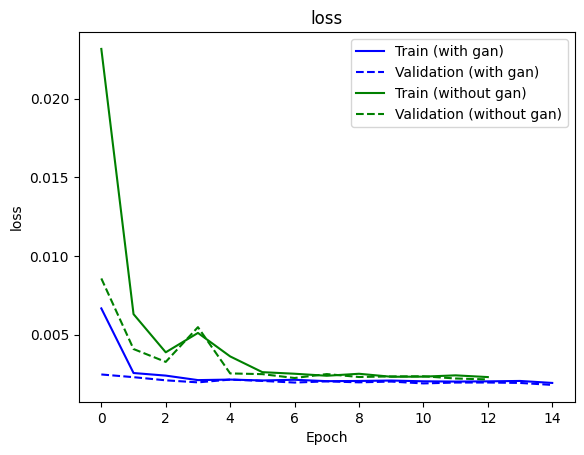

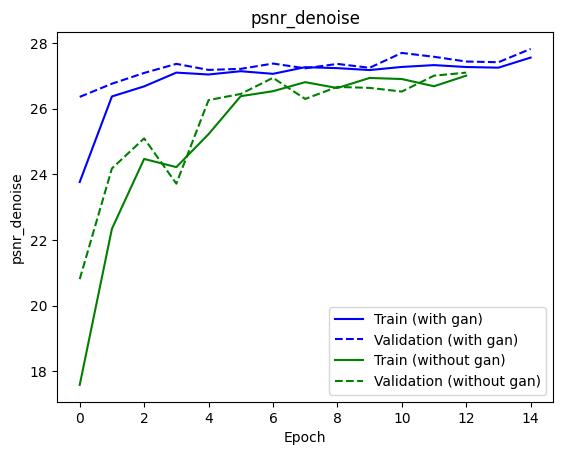

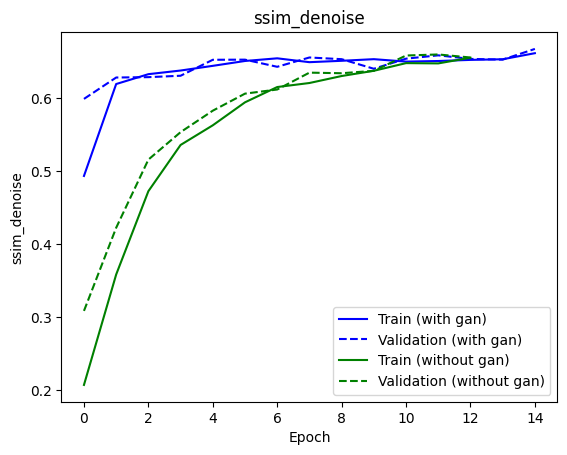

In [9]:
import os
import json
import matplotlib.pyplot as plt

# Function to read JSON files from a folder
def read_json_files_from_folder(folder_path):
    data = {}
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.json'):
            with open(os.path.join(folder_path, file_name), 'r') as f:
                epoch_number = int(file_name.split('_')[0].replace('epoch', ''))
                data[epoch_number] = json.load(f)
    return data

# Function to plot metrics
def plot_metrics(metrics_data_with_gan, metrics_data_without_gan, metric_name):
    epochs_with_gan = sorted(metrics_data_with_gan.keys())
    epochs_without_gan = sorted(metrics_data_without_gan.keys())

    train_values_with_gan = [metrics_data_with_gan[epoch][metric_name] for epoch in epochs_with_gan]
    val_values_with_gan = [metrics_data_with_gan[epoch]['val_' + metric_name] for epoch in epochs_with_gan]

    train_values_without_gan = [metrics_data_without_gan[epoch][metric_name] for epoch in epochs_without_gan]
    val_values_without_gan = [metrics_data_without_gan[epoch]['val_' + metric_name] for epoch in epochs_without_gan]

    plt.plot(epochs_with_gan, train_values_with_gan, label='Train (with gan)', color='blue')
    plt.plot(epochs_with_gan, val_values_with_gan, label='Validation (with gan)', linestyle='--', color='blue')

    plt.plot(epochs_without_gan, train_values_without_gan, label='Train (without gan)', color='green')
    plt.plot(epochs_without_gan, val_values_without_gan, label='Validation (without gan)', linestyle='--', color='green')

    plt.title(metric_name)
    plt.xlabel('Epoch')
    plt.ylabel(metric_name)
    plt.legend()
    plt.show()

# Folder paths containing JSON files
folder_path_with_gan = './weights_new/json_file_with_gan'
folder_path_without_gan = './weights_new/json_file_without_gan'

# Read JSON files from folders
metrics_data_with_gan = read_json_files_from_folder(folder_path_with_gan)
metrics_data_without_gan = read_json_files_from_folder(folder_path_without_gan)

# Plot metrics for both with_gan and without_gan
metrics_to_plot = ['loss', 'psnr_denoise', 'ssim_denoise']
for metric in metrics_to_plot:
    plot_metrics(metrics_data_with_gan, metrics_data_without_gan, metric)


In [13]:
from tabulate import tabulate

# Function to extract epoch-wise metrics for a folder
def extract_epoch_metrics(metrics_data, metric_name):
    epochs = sorted(metrics_data.keys())
    epoch_metrics = []
    for epoch in epochs:
        train_metric = metrics_data[epoch][metric_name]
        val_metric = metrics_data[epoch]['val_' + metric_name]
        epoch_metrics.append([epoch, train_metric, val_metric])
    return epoch_metrics

# Function to generate a table for a folder
def generate_table(folder_name, metrics_data):
    table_data = []
    for metric in metrics_to_compare:
        metrics = extract_epoch_metrics(metrics_data, metric)
        for epoch_metrics in metrics:
            table_data.append([epoch_metrics[0], metric, epoch_metrics[1], epoch_metrics[2]])
    table = tabulate(table_data, headers=['Epoch', 'Metric', 'Train', 'Validation'], tablefmt='grid')
    print(f"Metrics for {folder_name} folder:")
    print(table)

# Define the metrics to compare
metrics_to_compare = ['loss', 'psnr_denoise', 'ssim_denoise']

# Generate tables for each folder
generate_table("With GAN", metrics_data_with_gan)
generate_table("Without GAN", metrics_data_without_gan)


Metrics for With GAN folder:
+---------+--------------+-------------+--------------+
|   Epoch | Metric       |       Train |   Validation |
+=========+==============+=============+==============+
|       0 | loss         |  0.00667525 |   0.00247826 |
+---------+--------------+-------------+--------------+
|       1 | loss         |  0.00257004 |   0.00230658 |
+---------+--------------+-------------+--------------+
|       2 | loss         |  0.00240593 |   0.00210611 |
+---------+--------------+-------------+--------------+
|       3 | loss         |  0.00211935 |   0.00197625 |
+---------+--------------+-------------+--------------+
|       4 | loss         |  0.00215355 |   0.00215214 |
+---------+--------------+-------------+--------------+
|       5 | loss         |  0.00209812 |   0.00206842 |
+---------+--------------+-------------+--------------+
|       6 | loss         |  0.00214135 |   0.00196443 |
+---------+--------------+-------------+--------------+
|       7 | loss   